In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram


In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)


HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

# Quantum Circuit

In a circuit, we typically need to do three jobs:
<li> Encode the input</li>
<li> Do some actual computation </li>
<li> Extract an output</li>

Whether we are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the simplest program with very few bits, it is useful to represent this rpocess in a diagram known as circuit diagram. These have input on the left, outputs on the right and operations represented by arcane symbols in between. 


## Extract an output

In [3]:
qc_output = QuantumCircuit(8)

This circuit uses QuantumCircuit. QuantumCircuit takes the number of qubits in the quantum circuit as an argument.

The extraction of outputs in a quantum circuit is done using measure_all(). Each measurement tells a specific qubit to give an output to a specified output bit. The command qc_output.measure_all() adds a measurement to each qubit in the circuit qc_outpost

In [4]:
qc_output.measure_all()


In [5]:
qc_output.draw(initial_state=True) 


░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

Qubits are always initialized to give the output 0. Since we do not do anything to our qubits in the circuit above, this is exactly the the result we'll get when we measure them. We can see this by running the circuit many times and plotting the result in a histogram. We will find the result is always a 00000000: a 0 from each qubit.

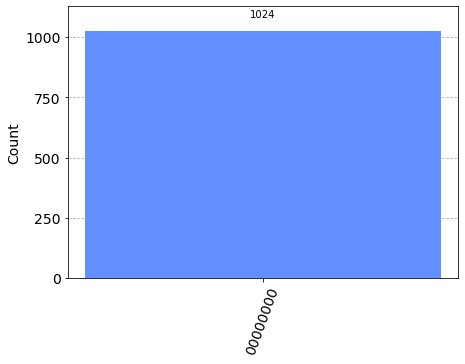

In [6]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

## Creating an Adder Circuit

### Encoding an input

Now let us look at hwo to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0.

For qubits, it is an operation called ```x``` that does the job of the NOT. 

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [8]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

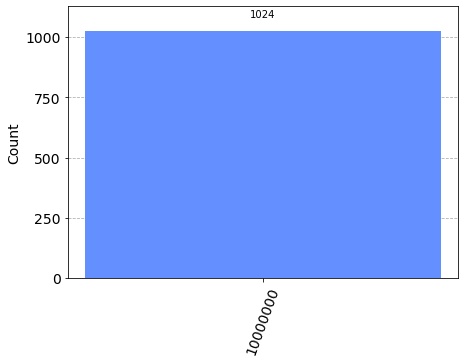

In [9]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

The strings are read from left to right so the above number is basically $2^7$

Now I will use a quantum circuit to write the number 34:

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [11]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
        ┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├─░──╫─┤M├──────────────────
        └───┘ ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
        ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├─░──╫──╫──╫──╫──╫─┤M├──────
        └───┘ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
              ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
              ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

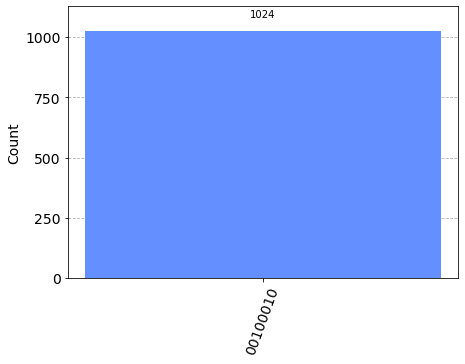

In [12]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

# Adding in Qubits

The four basic sums:

<li>$0+0 = 00$</li>
<li>$0+1 = 01$</li>
<li>$1+0 = 01$</li>
<li>$1+1 = 10$</li>

This is called half adder

# Controlled-NOT Gate

Functions the same as XOR Gate

In [13]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

This is applied to a pair of qubits. One acts as the control qubit. The dot is the control qubit and the other acts as teh target qubit. This is the one with an 'X' inside it. 

The CNOT looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes 0 if they are the same and 1 if they are different. 

In [14]:

qc = QuantumCircuit(2,2) # First argument is number of qubits and second is number of qubits being measured

qc.x(0)
qc.cx(0,1)

qc.measure(0,0) # Measure q_0 values on binary position  2^0 
qc.measure(1,1) # Measure q_1 values on binary position 2^1

qc.draw()



┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

So there is a 1 that goes from q_0. There is a 0 that goes from q_1. They are different so so since we have (2,2) circuit measurements, 1 basically measures values onto the 1st position. The value measured from q_0 onto the position $2^0$ is 1 and the value measured from q_1 onto position $2^1$ is 1.

The circuit above executes to give 11. 

<li> CNOT calculates whether the input values are different and finds out that they are. So output is 1. it does this by writing over the state of qubit 1 and turning 01 into 11 </li>

<li> CNOT sees that qubit 0 is in state 1 and so applies a NOT to qubit 1. This flips the 0 of qubit 1 into a 1. </li> 

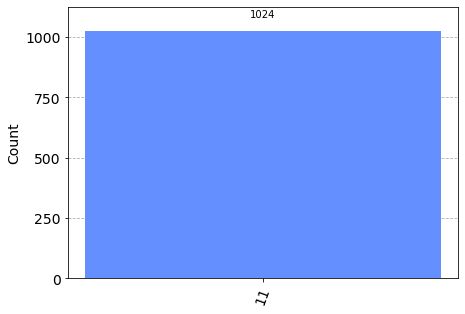

In [15]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)


For our actual half adder, we do not want to overwrite one of our inputs. Instead, we want to write the results on a different pair of qubits.

That is we do not want 11 we want 10 or 01

In [16]:

qc_ha = QuantumCircuit(4,2)

qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)

qc_ha.barrier()

qc_ha.measure(2,0) 
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

We are halfway through. We want qubit 3 to go to 1. THere is only 1 case this is 1. If 1 and 1. So we use AND Gate

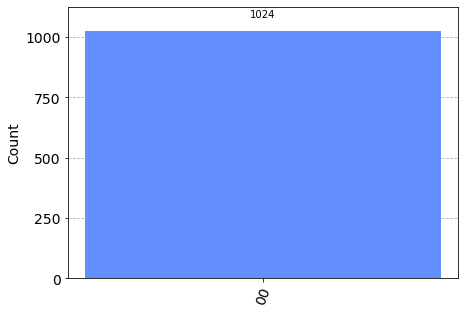

In [17]:

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)


In Qiskit, Toffoli is the AND circuit and is represented with the ccx command

In [18]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0)
qc_ha.x(1) 
qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2

qc_ha.cx(0,2)
qc_ha.cx(1,2)

#We use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

# extract outputs

qc_ha.measure(2,0) # extract XOR value

qc_ha.measure(3,1)


qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

The q_1 value overwrites the q_0 value.

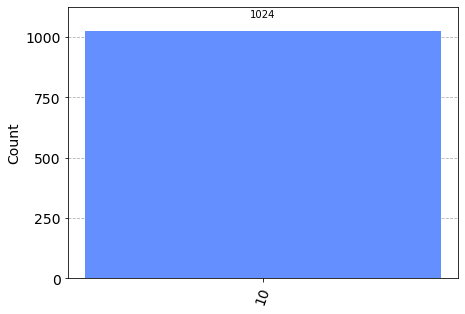

In [20]:

sim = Aer.get_backend('aer_simulator') 

result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)
